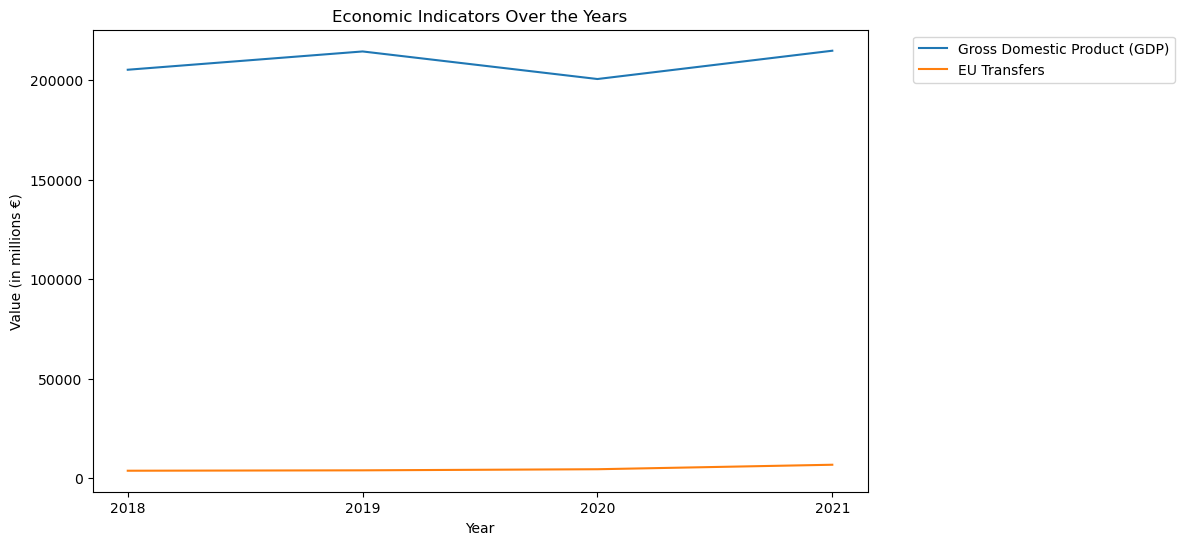

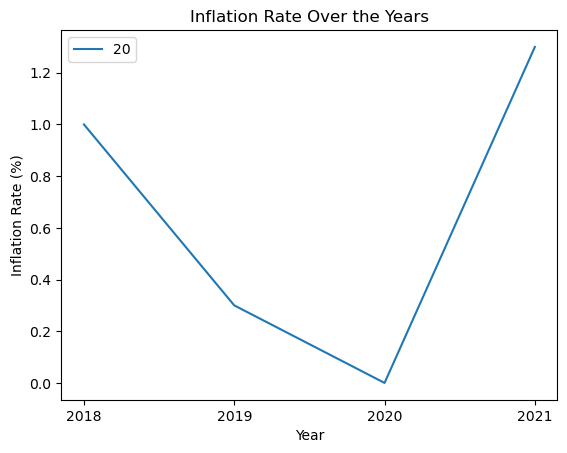

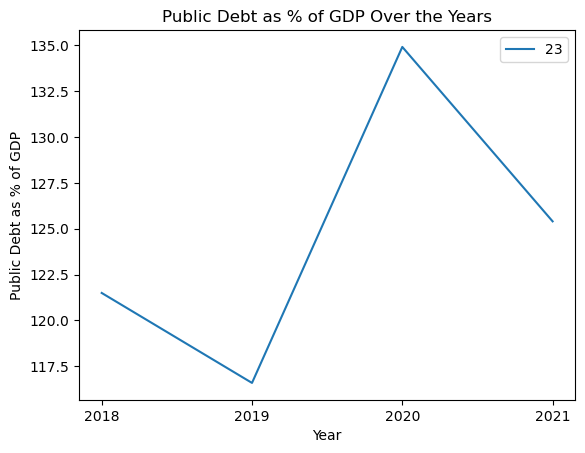

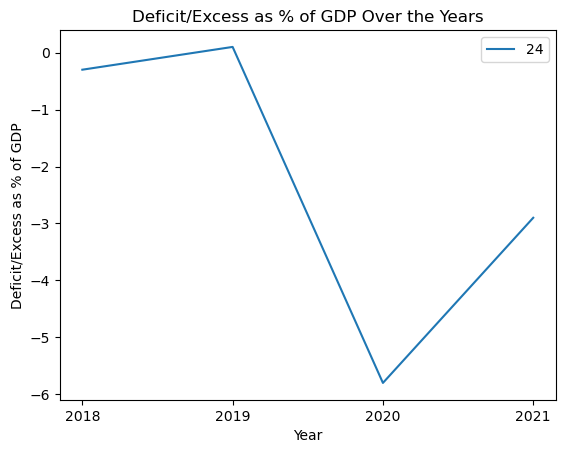

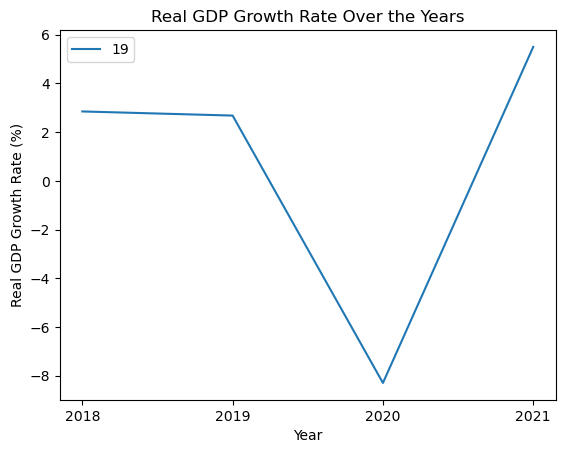

In [9]:
#Quais foram os efeitos da pandemia na economia do pais?
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker

# Function to load data
def load_data(filename):
    df = pd.read_excel(filename, skiprows=7)  # jumps the first 7 rows
    return df

# Function to clean data
def clean_data(df, label):
    df = df.iloc[:, :-2]  # Remove the last two columns
    row_index = df[df.columns[0]] == label
    data = df.loc[row_index]
    data = data.drop(data.columns[0], axis=1)
    data = data.transpose().reset_index()
    return data

# Main function
def main():
    filename = 'dados.xls'
    data = load_data(filename)

    economic_indicators = ['Produto Interno Bruto (PIB) ', 'Transferências recebidas da União Europeia ']

    other_indicators = ['Taxa de inflação (%) ', 'Dívida Pública em % do PIB ', 'Défice/Excedente em % do PIB (2)', 'Taxa de crescimento real do PIB (%) (1)']

    cleaned_data_economic = []
    cleaned_data_other = []

    for indicator in economic_indicators:
        cleaned_data = clean_data(data, indicator)
        cleaned_data_economic.append(cleaned_data)

    for indicator in other_indicators:
        cleaned_data = clean_data(data, indicator)
        cleaned_data_other.append(cleaned_data)

    plt.figure(figsize=(10, 6))

    for i, cleaned_data in enumerate(cleaned_data_economic):
        try:
            values = cleaned_data.iloc[:, 1].to_numpy()
            index = cleaned_data['index'].to_numpy()

            if i == 0:
                plt.plot(index, values, label='Gross Domestic Product (GDP)')
            elif i == 1:
                plt.plot(index, values, label='EU Transfers')

        except IndexError:
            continue

    plt.xlabel('Year')
    plt.ylabel('Value (in millions €)')
    plt.title('Economic Indicators Over the Years')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

    for i, cleaned_data in enumerate(cleaned_data_other):
        try:
            values = cleaned_data.iloc[:, 1].to_numpy()
            index = cleaned_data['index'].to_numpy()

            plt.figure()
            plt.plot(index, values, label=cleaned_data.columns[1])
            plt.xlabel('Year')

            if i == 0:
                plt.ylabel('Inflation Rate (%)')
                plt.title('Inflation Rate Over the Years')
            elif i == 1:
                plt.ylabel('Public Debt as % of GDP')
                plt.title('Public Debt as % of GDP Over the Years')
            elif i == 2:
                plt.ylabel('Deficit/Excess as % of GDP')
                plt.title('Deficit/Excess as % of GDP Over the Years')
            elif i == 3:
                plt.ylabel('Real GDP Growth Rate (%)')
                plt.title('Real GDP Growth Rate Over the Years')
            plt.legend()
            plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
            plt.show()

        except IndexError:
            continue

# Run the main function
if __name__ == '__main__':
    main()
#resposta etc etc